### Tasking:
- [x] Transfer data from the paper
- [?] Split stars into hot (>10240 K) and cold (<8623 K)
- [x] For hot: EW_HA vs temperature
- [x] For cold: EW_Na vs temperature
- [?] Fit functions
- [ ] Give temperature estimation and type for three unknown stars, also tell spectral type

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import numpy as np
from scipy.interpolate import interp1d

In [240]:
path_to_data = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_3\DATA\ew_types.csv"

df = pd.read_csv(path_to_data)

path_to_unknown = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_3\DATA\ew_unknown.csv"
df_unknown = pd.read_csv(path_to_unknown)

df

,Star,Type,EW_HA,EW_NA,TEMPERATURE
0,HD886,B2IV,4.0345,0.1116,22400
1,HD120315,B3V,4.6587,0.0568,18445
2,HR9087,B7IV,5.2180,0.2340,12915
3,HR8634,B8V,6.2270,0.1830,12120
4,HD196867,B9IV,7.6562,0.3096,11020
5,HR5501,B9.5V,7.9790,0.4610,10340
6,HD130109,A0III,13.4821,0.3774,10240
7,HR262,A3V,12.1643,0.5707,8625
8,HD116842,A5V,15.0043,0.5211,8170
9,HD4758,A9III,6.5495,0.7579,7500


In [241]:
df_cold = df[df["TEMPERATURE"] < 8000]
df_hot = df[df["TEMPERATURE"] > 8000]

In [242]:
def exp_decay(x, a, b, x0, c):
    return a * np.exp(-b * (x - x0)) + c

popt, pcov = curve_fit(exp_decay, df_hot['TEMPERATURE'], df_hot['EW_HA'], p0=[4, 0.0003, 5000, -2])

a_fit, b_fit, x_0, c_fit = popt

x_fit_exp = np.linspace(8000, 23000, 100)
y_fit_exp = exp_decay(x_fit_exp, a_fit, b_fit, x_0, c_fit)

interp_func = interp1d(y_fit_exp, x_fit_exp, kind='linear', fill_value="extrapolate")

df_unknown['TEMPERATURE'] = interp_func(df_unknown['EW_HA'])

df_unknown

# print(a_fit, b_fit, x_0, c_fit)

,Star,EW_HA,EW_NA,TEMPERATURE
0,HR718,9.2102,0.1851,10403.396985
1,HD137391,6.5065,0.8082,12587.898766
2,HD160269,2.2955,2.3275,71326.560978


In [243]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, df_cold['TEMPERATURE'], df_cold['EW_HA'], p0=[0.001, -5000])

a_fit, b_fit = popt

x_fit = np.linspace(4500, 8000, 100)
y_fit = linear(x_fit, a_fit, b_fit)

interp_func = interp1d(y_fit, x_fit, kind='linear', fill_value="extrapolate")

df_unknown['TEMPERATURE'] = interp_func(df_unknown['EW_HA'])

df_unknown

,Star,EW_HA,EW_NA,TEMPERATURE
0,HR718,9.2102,0.1851,8997.346628
1,HD137391,6.5065,0.8082,7646.450744
2,HD160269,2.2955,2.3275,5542.436775


Text(0, 0.5, 'log(EW H-alpha/EW D1D2)')

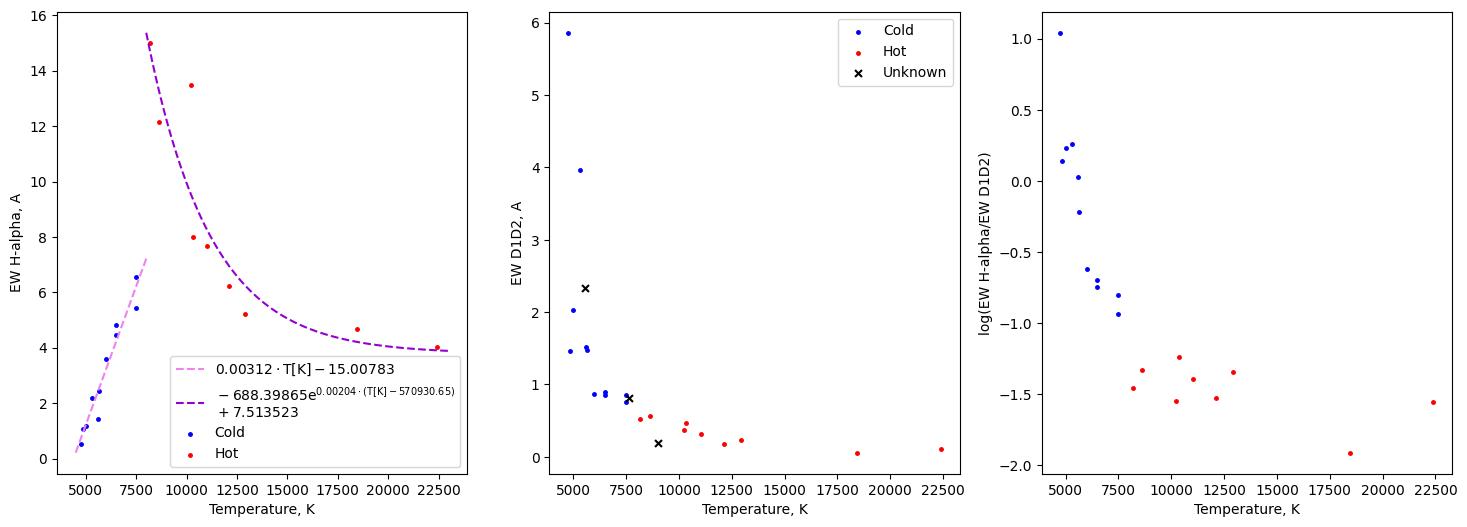

In [244]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]

ax.plot(x_fit, y_fit, color='violet', linestyle='dashed', label=r'$\rm 0.00312 \cdot T[K] - 15.00783$')
ax.plot(x_fit_exp, y_fit_exp, color='darkviolet', linestyle='dashed', label=r'$\rm -688.39865 e^{0.00204 \cdot (T[K] - 570930.65)}$' + '\n'+ r'$\rm + 7.513523$')
ax.scatter(df_cold['TEMPERATURE'], df_cold['EW_HA'], color='blue', marker='.', s=25, label='Cold')
ax.scatter(df_hot['TEMPERATURE'], df_hot['EW_HA'], color='red', marker='.', s=25, label='Hot')
ax.set_xlabel('Temperature, K')
ax.set_ylabel('EW H-alpha, A')

ax.legend()

ax = axes[1]

ax.scatter(df_cold['TEMPERATURE'], df_cold['EW_NA'], color='blue', marker='.', s=25, label='Cold')
ax.scatter(df_hot['TEMPERATURE'], df_hot['EW_NA'], color='red', marker='.', s=25, label='Hot')
ax.scatter(df_unknown['TEMPERATURE'], df_unknown['EW_NA'], color='black', marker='x', s=25, label='Unknown')
ax.set_xlabel('Temperature, K')
ax.set_ylabel('EW D1D2, A')
ax.legend()

ax = axes[2]

ax.scatter(df_cold['TEMPERATURE'], np.log10(df_cold['EW_NA']/df_cold['EW_HA']), color='blue', marker='.', s=25, label='Cold')
ax.scatter(df_hot['TEMPERATURE'], np.log10(df_hot['EW_NA']/df_hot['EW_HA']), color='red', marker='.', s=25, label='Hot')
ax.set_xlabel('Temperature, K')
ax.set_ylabel('log(EW H-alpha/EW D1D2)')

In [245]:
interp_func = interp1d(y_fit, x_fit, kind='linear', fill_value="extrapolate")

df_unknown['TEMPERATURE'] = interp_func(np.log10(df_unknown['EW_NA']/df_unknown['EW_HA']))

df_unknown

,Star,EW_HA,EW_NA,TEMPERATURE
0,HR718,9.2102,0.1851,3547.664329
1,HD137391,6.5065,0.8082,3942.902206
2,HD160269,2.2955,2.3275,4398.500914


In [246]:
def modified_hyperbola(x, a, b):
    return a * x + b 

df_hot = df[df['TEMPERATURE'] > 6000]

popt, pcov = curve_fit(modified_hyperbola, df_hot['TEMPERATURE'], np.log10(df_hot['EW_NA']), p0=[-0.1, 5000])

a_fit, b_fit = popt

x_fit = np.linspace(4800, 23000, 100)
y_fit = modified_hyperbola(x_fit, a_fit, b_fit)

In [247]:
interp_func = interp1d(y_fit, x_fit, kind='linear', fill_value="extrapolate")

df_unknown['TEMPERATURE'] = interp_func(np.log10(df_unknown['EW_NA']))

df_unknown

,Star,EW_HA,EW_NA,TEMPERATURE
0,HR718,9.2102,0.1851,15075.037249
1,HD137391,6.5065,0.8082,6159.265570
2,HD160269,2.2955,2.3275,-239.056633


Text(0, 0.5, 'log(EW H-alpha/EW D1D2)')

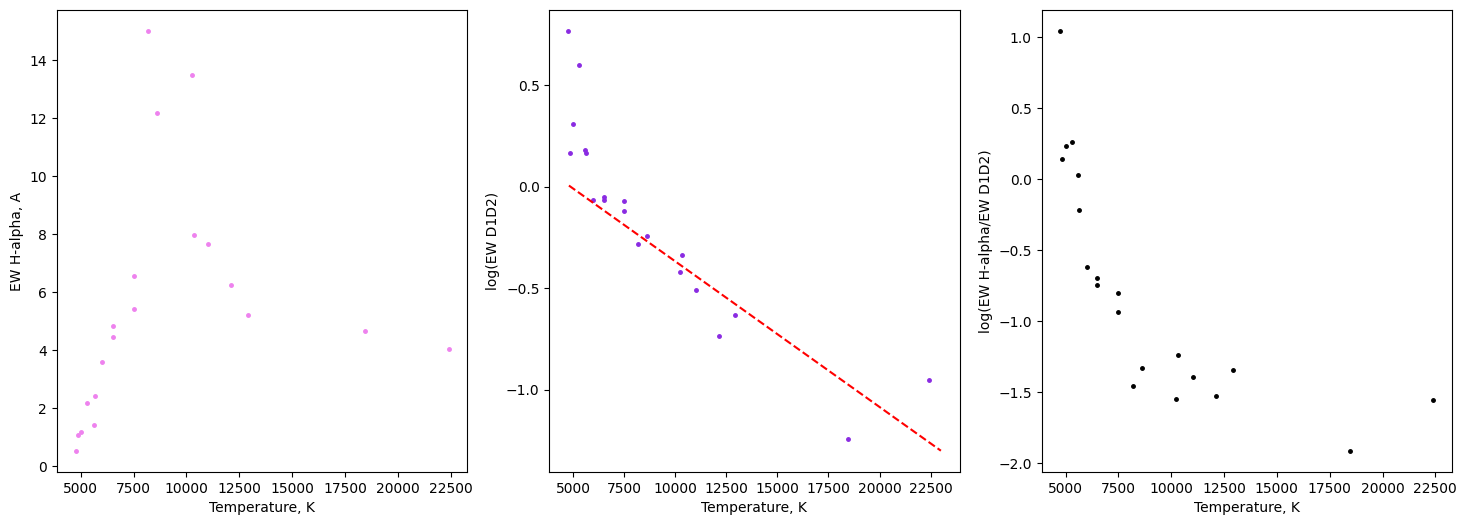

In [248]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]

ax.scatter(df['TEMPERATURE'], df['EW_HA'], color='violet', marker='.', s=25)
ax.set_xlabel('Temperature, K')
ax.set_ylabel('EW H-alpha, A')

ax = axes[1]

ax.scatter(df['TEMPERATURE'], np.log10(df['EW_NA']), color='blueviolet', marker='.', s=25)
ax.set_xlabel('Temperature, K')
ax.set_ylabel('log(EW D1D2)')
ax.plot(x_fit, y_fit, color='red', linestyle='dashed')


ax = axes[2]

ax.scatter(df['TEMPERATURE'], np.log10(df['EW_NA']/df['EW_HA']), color='black', marker='.', s=25)
ax.set_xlabel('Temperature, K')
ax.set_ylabel('log(EW H-alpha/EW D1D2)')